# 大作业标题： 基于深度学习的图像识别系统：手写数字识别

附录

github项目链接（含代码、数据）
附带仓库目录结构截图

In [1]:
import torch
import torchvision
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST


D:\Anaconda3\envs\deepforest\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch.utils.data import random_split
transform_train = transforms.Compose([
    transforms.RandomRotation(10),  # 随机旋转10度
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # 归一化
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# 下载数据并应用转换
train_val_dataset = MNIST(root='./data', train=True, download=True, transform=transform_train)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform_test)

# 划分训练集和验证集
train_size = int(0.4 * len(train_val_dataset))  
val_size = len(train_val_dataset) - train_size  
train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])

# 数据加载器
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.1),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.1),

            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.1),

            nn.Flatten(),

            nn.Linear(32 * 3 * 3, 128),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.layers(x)


In [4]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

def train_and_validate(model, train_loader, val_loader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        
        print(f'Epoch {epoch + 1}/{epochs}')
        train_progress = tqdm(train_loader, desc='Training', leave=False)
        for images, labels in train_progress:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            train_progress.set_postfix(loss=loss.item())
        
        total_val_loss = 0
        correct = 0
        total = 0
        model.eval()
        val_progress = tqdm(val_loader, desc='Validating', leave=False)
        with torch.no_grad():
            for images, labels in val_progress:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                val_progress.set_postfix(loss=loss.item())

        print(f'Epoch {epoch+1}: Train Loss: {total_train_loss / len(train_loader):.4f}, '
              f'Val Loss: {total_val_loss / len(val_loader):.4f}, '
              f'Accuracy: {100 * correct / total:.2f}%')


In [5]:
model = CNN()
train_and_validate(model, train_loader, val_loader)

Epoch 1/10


Epoch 1: Train Loss: 1.9400, Val Loss: 1.7551, Accuracy: 71.02%
Epoch 2/10


Epoch 2: Train Loss: 1.7542, Val Loss: 1.7140, Accuracy: 74.79%
Epoch 3/10


Epoch 3: Train Loss: 1.7225, Val Loss: 1.7016, Accuracy: 75.99%
Epoch 4/10


Epoch 4: Train Loss: 1.6559, Val Loss: 1.6138, Accuracy: 84.81%
Epoch 5/10


Epoch 5: Train Loss: 1.6276, Val Loss: 1.6109, Accuracy: 85.01%
Epoch 6/10


Epoch 6: Train Loss: 1.5925, Val Loss: 1.5504, Accuracy: 91.10%
Epoch 7/10


Epoch 7: Train Loss: 1.5567, Val Loss: 1.5212, Accuracy: 94.11%
Epoch 8/10


Epoch 8: Train Loss: 1.5371, Val Loss: 1.5177, Accuracy: 94.44%
Epoch 9/10


Epoch 9: Train Loss: 1.5285, Val Loss: 1.5075, Accuracy: 95.47%
Epoch 10/10


Epoch 10: Train Loss: 1.5213, Val Loss: 1.5062, Accuracy: 95.55%



Classification Report:
              precision    recall  f1-score   support

           0     0.9711    0.9939    0.9823       980
           1     0.9947    0.9894    0.9920      1135
           2     0.9471    0.9535    0.9503      1032
           3     0.9857    0.9535    0.9693      1010
           4     0.9896    0.9684    0.9789       982
           5     0.9625    0.9507    0.9566       892
           6     0.9425    0.9749    0.9584       958
           7     0.9746    0.9698    0.9722      1028
           8     0.9504    0.9641    0.9572       974
           9     0.9613    0.9604    0.9608      1009

    accuracy                         0.9682     10000
   macro avg     0.9679    0.9679    0.9678     10000
weighted avg     0.9684    0.9682    0.9682     10000



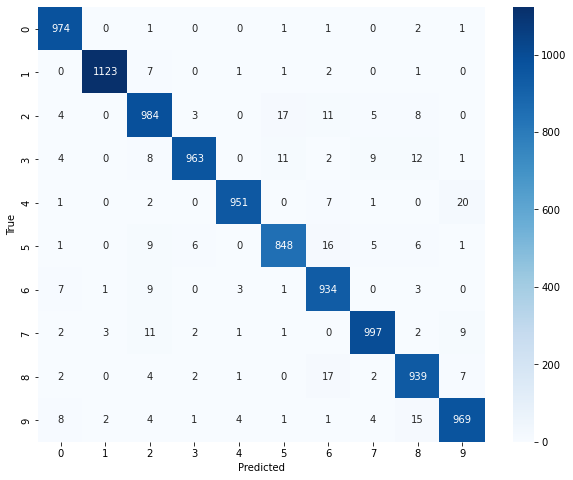

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


def test_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing', leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 计算性能指标
    print("\nClassification Report:")
    print(classification_report(all_labels, all_predictions, digits=4))
    
    # 生成并显示混淆矩阵
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

test_model(model, test_loader)

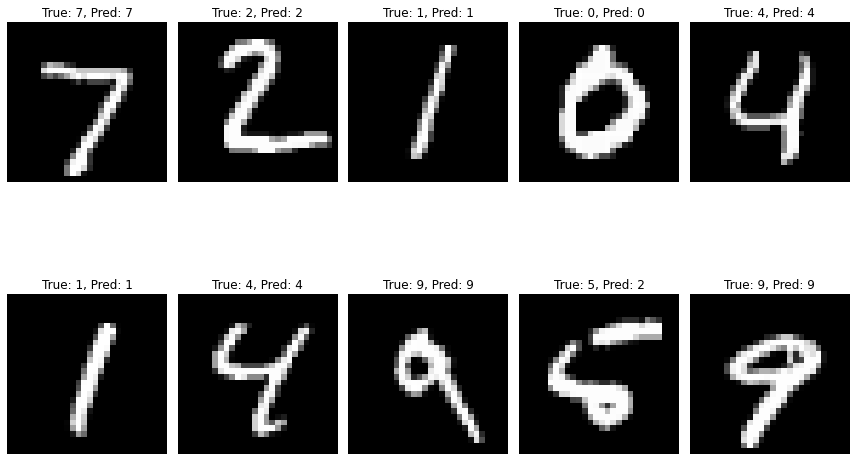

In [7]:
def visualize_predictions(model, test_loader, num_images=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
    
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predictions = predictions.cpu().numpy()
    
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(num_images//5 + 1, 5, i+1)
        plt.imshow(np.squeeze(images[i]), cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_loader)

### 模型优化 通过调整网络结构，引入批批量标准化提升模型性能

In [8]:
class SimplifiedCNN(nn.Module):
    def __init__(self):
        super(SimplifiedCNN, self).__init__()
        self.layers = nn.Sequential(
            # 第一层卷积层
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),  # 批归一化
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 池化层
            nn.Dropout(0.2),  # Dropout正则化

            # 第二层卷积层
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),  # 批归一化
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # 池化层
            nn.Dropout(0.2),  # Dropout正则化

            # 展平层，准备连接全连接层
            nn.Flatten(),

            # 全连接层
            nn.Linear(64 * 7 * 7, 128),
            nn.BatchNorm1d(128),  # 批归一化
            nn.ReLU(),
            nn.Dropout(0.2),  # Dropout正则化

            # 输出层
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.layers(x)

In [9]:
sim_model = SimplifiedCNN()
train_and_validate(sim_model, train_loader, val_loader)

Epoch 1/10


Epoch 1: Train Loss: 1.6889, Val Loss: 1.5582, Accuracy: 92.42%
Epoch 2/10


Epoch 2: Train Loss: 1.5535, Val Loss: 1.5212, Accuracy: 95.23%
Epoch 3/10


Epoch 3: Train Loss: 1.5294, Val Loss: 1.5072, Accuracy: 96.29%
Epoch 4/10


Epoch 4: Train Loss: 1.5180, Val Loss: 1.4993, Accuracy: 96.84%
Epoch 5/10


Epoch 5: Train Loss: 1.5104, Val Loss: 1.4986, Accuracy: 96.84%
Epoch 6/10


Epoch 6: Train Loss: 1.5072, Val Loss: 1.4943, Accuracy: 97.16%
Epoch 7/10


Epoch 7: Train Loss: 1.5045, Val Loss: 1.4929, Accuracy: 97.24%
Epoch 8/10


Epoch 8: Train Loss: 1.5005, Val Loss: 1.4887, Accuracy: 97.63%
Epoch 9/10


Epoch 9: Train Loss: 1.4978, Val Loss: 1.4893, Accuracy: 97.52%
Epoch 10/10


Epoch 10: Train Loss: 1.4966, Val Loss: 1.4872, Accuracy: 97.69%



Classification Report:
              precision    recall  f1-score   support

           0     0.9779    0.9929    0.9853       980
           1     0.9843    0.9965    0.9904      1135
           2     0.9654    0.9729    0.9691      1032
           3     0.9940    0.9812    0.9875      1010
           4     0.9898    0.9857    0.9878       982
           5     0.9786    0.9753    0.9770       892
           6     0.9852    0.9697    0.9774       958
           7     0.9777    0.9805    0.9791      1028
           8     0.9948    0.9856    0.9902       974
           9     0.9773    0.9812    0.9792      1009

    accuracy                         0.9824     10000
   macro avg     0.9825    0.9822    0.9823     10000
weighted avg     0.9825    0.9824    0.9824     10000



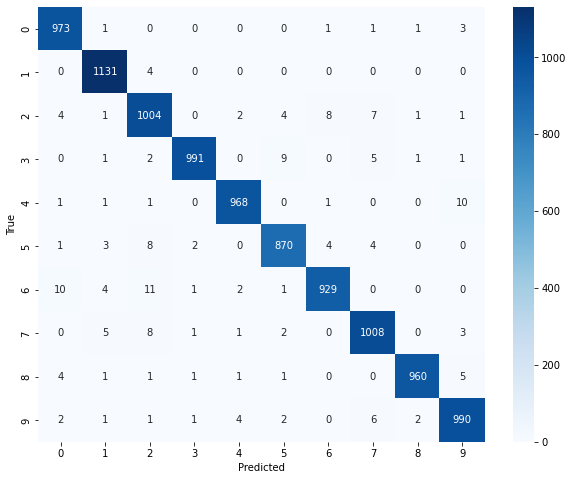

In [10]:
test_model(sim_model, test_loader)